In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

# 六角形箱体图
你可以使用DataFrame.plot.hexbin（）创建六边形图形图。 

如果您的数据太密集，可以单独绘制每个点，六角形箱体图可以是散点图的有用替代方法。

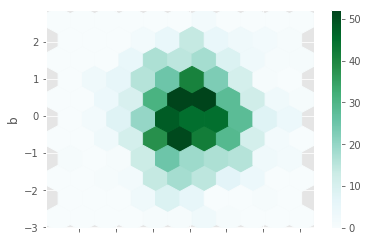

In [2]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a', y='b', gridsize=10)

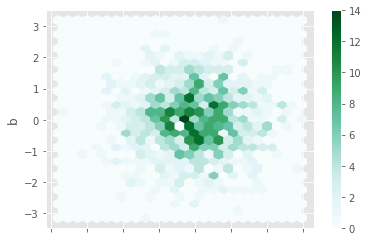

In [3]:
# 注：左边坐标表示的是值的分布（这个图是二维标准正态分布）
# 右边是数据量大小与颜色的对比，gridsize=10指的是大小，我们将其调为25：

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a', y='b', gridsize=25)

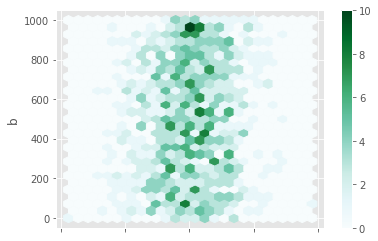

In [4]:
# 我们接下来不做二维正态分布的图，加一个干扰：

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

一个有用的关键字参数是gridsize; 它控制x方向的六边形数量，并且默认为100.较大的格栅意味着更多的较小的分区。

默认情况下，计算每个（x，y）点周围计数的直方图。 可以通过将值传递给C和reduce_C_function参数来指定替代聚合。

C指定每个（x，y）点处的值，reduce_C_function是一个参数的函数，将一个bin中的所有值都减少为一个数字（例如，mean，max，sum，std）。 

在该示例中，位置由列a和b给出，而值由列z给出。 bins与numpy的最大功能相结合。

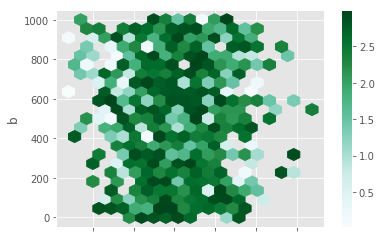

In [6]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
               gridsize=20)
# 注：这里z为在0-3上的均匀分布

## 饼图
可以使用DataFrame.plot.pie（）或Series.plot.pie（）创建饼图。 

如果您的数据包含任何NaN，它们将自动填满0.如果数据中有任何负值，则会引发ValueError。

In [15]:
np.random.rand(4)

array([0.54792414, 0.28851015, 0.03140726, 0.45428968])

In [14]:
3 * np.random.rand(4)

array([1.81276734, 2.84808732, 1.97196693, 0.22047848])

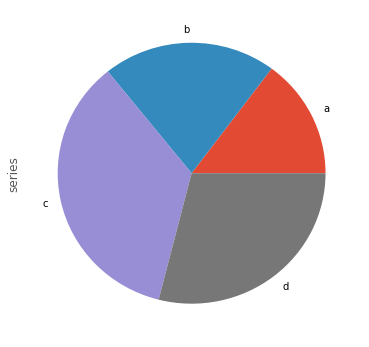

In [8]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))
# 注：饼图大小为6x6,如果长宽不一样，画出来是类似椭圆的

对于饼图，最好使用平方数字，具有相等的长宽比。 

可以创建具有相同宽度和高度的图形，或者通过在返回的轴对象上调用ax.set_aspect（'equal'）来强制绘制后的宽高比相等。

请注意，使用DataFrame的饼图需要您通过y参数或subplots = True指定目标列。 

指定y时，将绘制所选列的饼图。 如果指定subplots= True，则每列的饼图将绘制为子图。 

默认情况下，每个饼图将绘制一个图例; 指定legend = False隐藏它。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113c35940>,
      dtype=object)

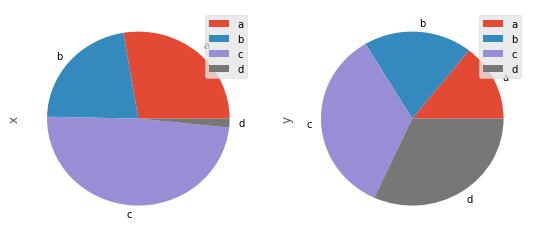

In [10]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(9,4))
# 注：子图绘制，默认显示图例，可以自己指定整个图的长宽大小（这里我选取9x4最后效果比较好）

您可以使用标签和颜色关键字来指定每块的标签和颜色。

如果要隐藏标签，请指定标签=无。 如果指定了fontsize，该值将应用于标签。 

另外，可以使用matplotlib.pyplot.pie（）支持的其他关键字。



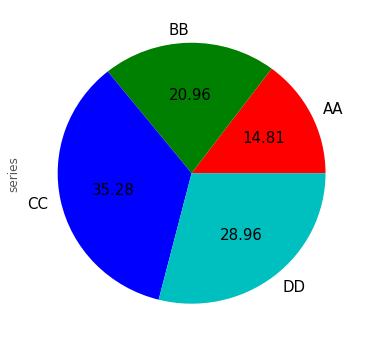

In [12]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                 autopct='%.2f', fontsize=15, figsize=(6, 6))
# 注：colors指定每块对应的颜色，autopct是自动计算百分比显示，fontsize是百分比字体显示的大小

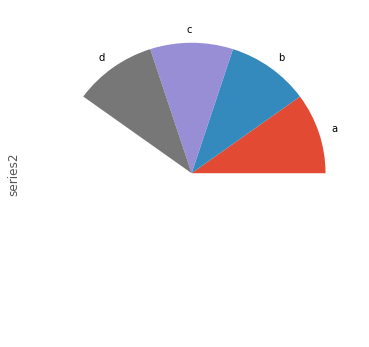

In [13]:
# 如果您传递总和小于1.0的值，则matplotlib绘制半圆。
# [0.1] * 4 是快速创建列表的一种方式
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))